In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [160]:
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    LabelEncoder,
    PolynomialFeatures
)
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    LogisticRegressionCV,
    SGDRegressor,
    SGDClassifier,
    Ridge,
    RidgeCV,
    Lasso,
    LassoCV,
    ElasticNet,
    ElasticNetCV
)
from sklearn.svm import (
    SVR,
    SVC
)
from sklearn.neighbors import (
    KNeighborsClassifier,
    KNeighborsRegressor
)
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor
)
from sklearn.naive_bayes import(
    GaussianNB,
    MultinomialNB,
    BernoulliNB
)
from sklearn import tree
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    GradientBoostingClassifier,
    GradientBoostingRegressor,
    AdaBoostClassifier,
    AdaBoostRegressor,
    ExtraTreesClassifier,
    ExtraTreesRegressor,
    HistGradientBoostingClassifier,
    HistGradientBoostingRegressor
)

# from xgboost import XGBClassifier, XGBRegressor
# from lightgbm import LGBMClassifier, LGBMRegressor
# from catboost import CatBoostClassifier, CatBoostRegressor

# from sklearn.discriminant_analysis import (
#     LinearDiscriminantAnalysis,
#     QuadraticDiscriminantAnalysis
# )

from sklearn.neural_network import (
    MLPClassifier,
    MLPRegressor
)


from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc
)
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_squared_log_error,
    median_absolute_error
)
from sklearn.pipeline import Pipeline

In [161]:
df=pd.read_csv("/content/Travel.csv")

In [162]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [164]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [165]:
for column in df.columns:
  if df[column].dtype=="O":
    print(df[column].value_counts())
    print("*"*50)

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
**************************************************
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
**************************************************
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
**************************************************
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
**************************************************
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
**************************************************
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64
************************************

In [166]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [167]:
df["Gender"]=df["Gender"].replace("Fe Male","Female")

In [168]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [169]:
df["MaritalStatus"]=df["MaritalStatus"].replace("Unmarried","Single")

In [170]:
df["MaritalStatus"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [171]:
for column in df.columns:
  if df[column].dtype=="O":
    print(df[column].value_counts())
    print("*"*50)

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
**************************************************
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
**************************************************
Gender
Male      2916
Female    1972
Name: count, dtype: int64
**************************************************
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
**************************************************
MaritalStatus
Married     2340
Single      1598
Divorced     950
Name: count, dtype: int64
**************************************************
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64
**************************************************


In [172]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [173]:
cat_features=df.select_dtypes(include="O").columns
num_features=df.select_dtypes(exclude="O").columns

In [174]:
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [175]:
num_features

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [176]:
for column in df.columns:
  if column in cat_features:
    df[column]=df[column].fillna(df[column].mode()[0])
  else:
    df[column]=df[column].fillna(df[column].mean())

In [177]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


In [178]:
df[num_features].corr()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
CustomerID,1.000000,0.056506,0.031362,0.012975,0.062645,0.604013,0.425555,0.010517,0.221261,0.007974,-0.035847,0.003805,0.508744,0.270023
ProdTaken,0.056506,1.000000,-0.143717,0.086852,0.076297,0.009627,0.111675,0.099265,0.018739,0.260844,0.051394,-0.011508,0.007388,-0.128092
Age,0.031362,-0.143717,1.000000,-0.015344,-0.011280,0.011298,-0.002477,-0.010130,0.175526,0.032602,0.018055,0.047525,0.006617,0.456273
CityTier,0.012975,0.086852,-0.015344,1.000000,0.022020,-0.001671,0.023524,-0.009145,-0.029352,0.001793,-0.042160,0.003817,0.000668,0.050644
DurationOfPitch,0.062645,0.076297,-0.011280,0.022020,1.000000,0.063310,0.009197,-0.006448,0.009470,0.032245,-0.002810,-0.001585,0.030349,-0.006004
NumberOfPersonVisiting,0.604013,0.009627,0.011298,-0.001671,0.063310,1.000000,0.326649,0.033749,0.192513,0.011177,-0.019581,0.010362,0.607215,0.189278
NumberOfFollowups,0.425555,0.111675,-0.002477,0.023524,0.009197,0.326649,1.000000,-0.023957,0.137420,0.004951,0.004035,0.012057,0.283545,0.172591
PreferredPropertyStar,0.010517,0.099265,-0.010130,-0.009145,-0.006448,0.033749,-0.023957,1.000000,0.011880,0.001038,-0.022635,0.015712,0.035378,0.013432
NumberOfTrips,0.221261,0.018739,0.175526,-0.029352,0.009470,0.192513,0.137420,0.011880,1.000000,0.012769,-0.004307,-0.011666,0.164996,0.120758
Passport,0.007974,0.260844,0.032602,0.001793,0.032245,0.011177,0.004951,0.001038,0.012769,1.000000,0.002926,-0.022330,0.020132,0.002488


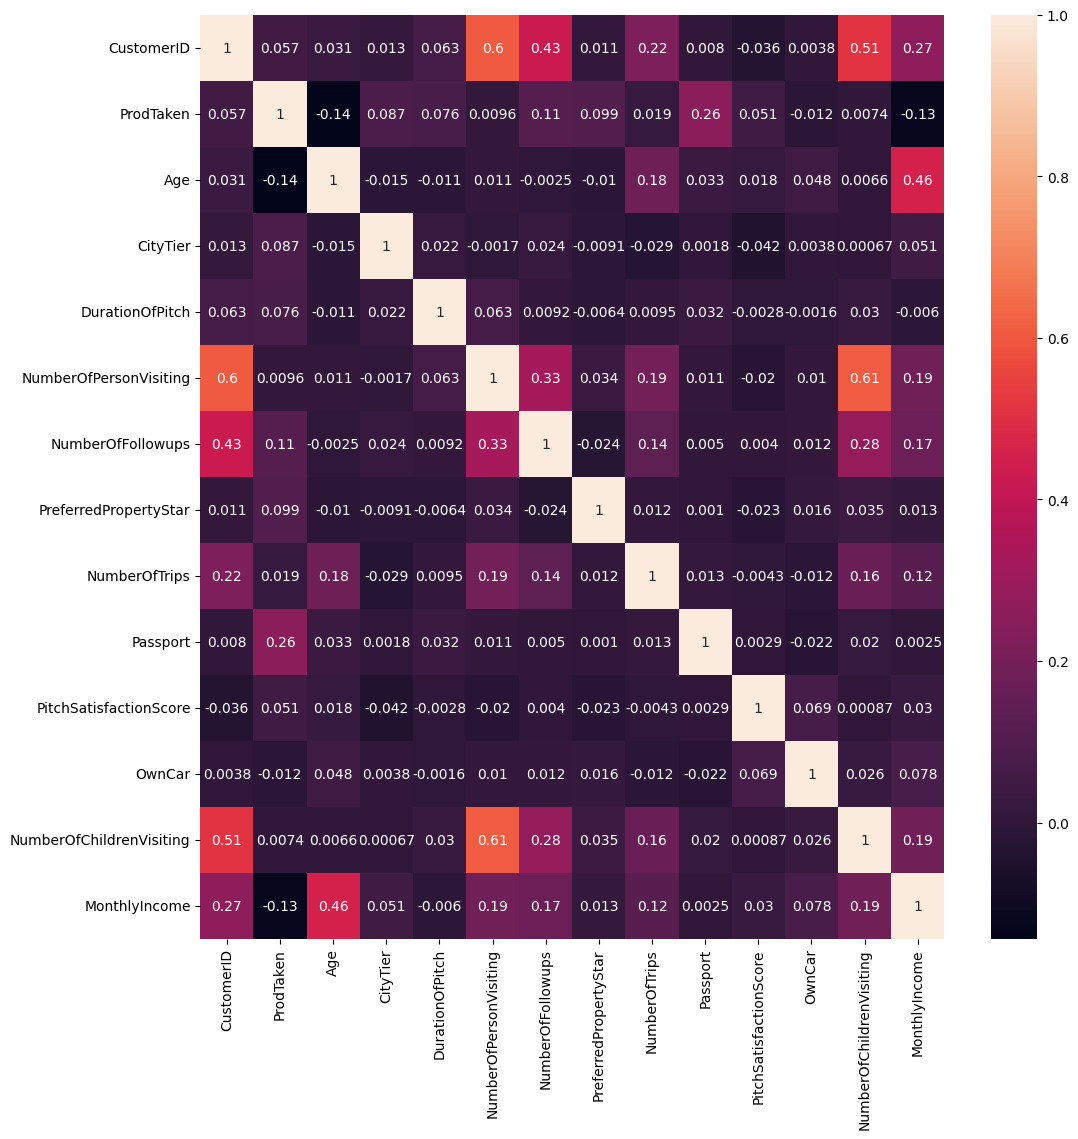

In [179]:
plt.figure(figsize=(12,12))
snb.heatmap(df[num_features].corr(),annot=True)
plt.show()

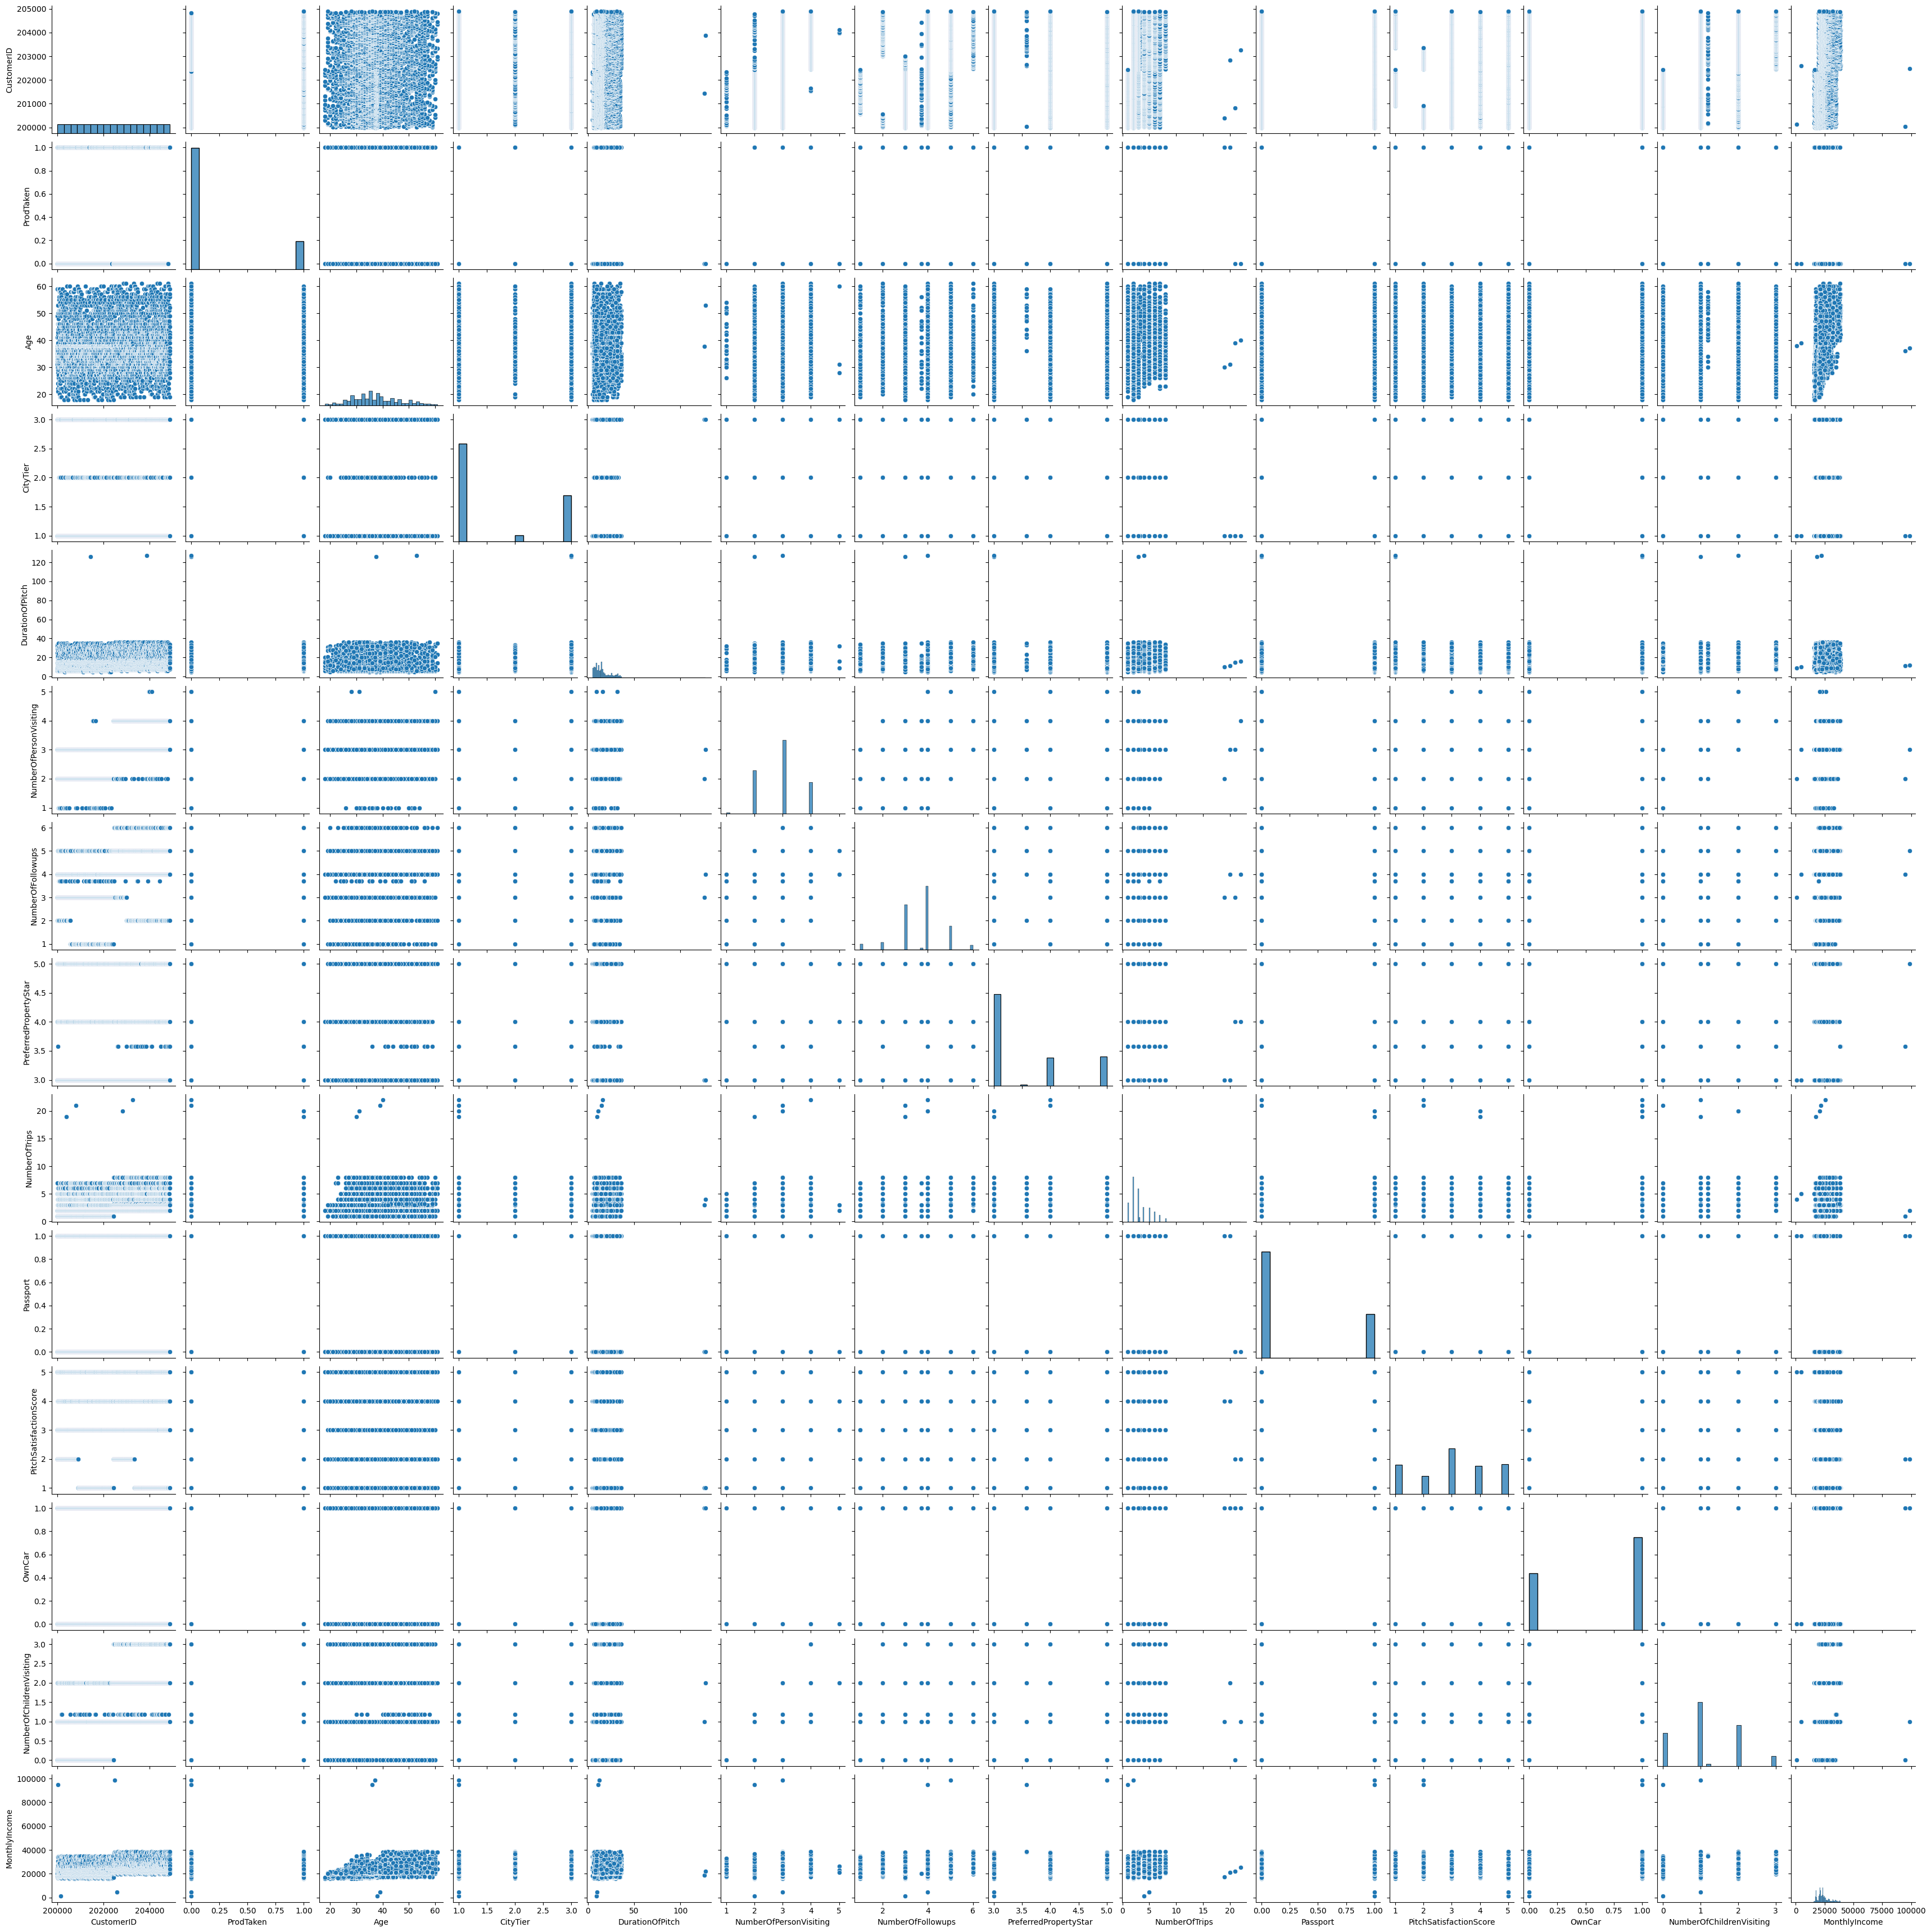

In [180]:
snb.pairplot(df[num_features])

In [181]:
output="ProdTaken"
x=df.drop([output],axis=1)
y=pd.DataFrame(df[output],columns=[output])

In [182]:
type(x),type(y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [183]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [184]:
type(x_train),type(x_test),type(y_train),type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [185]:
num_features=[num for num in num_features if num!=output]

In [186]:
num_features,cat_features

(['CustomerID',
  'Age',
  'CityTier',
  'DurationOfPitch',
  'NumberOfPersonVisiting',
  'NumberOfFollowups',
  'PreferredPropertyStar',
  'NumberOfTrips',
  'Passport',
  'PitchSatisfactionScore',
  'OwnCar',
  'NumberOfChildrenVisiting',
  'MonthlyIncome'],
 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation'],
       dtype='object'))

In [187]:
scaler=ColumnTransformer([
    ("num_feature_scaler",StandardScaler(),num_features),
    ("cat_feature_scaler",OneHotEncoder(drop="first",handle_unknown="ignore"),cat_features)
])

In [188]:
x_train_processed=scaler.fit_transform(x_train)
x_test_processed=scaler.transform(x_test)

In [192]:
params={
    "n_estimators":[50,80,100],
    "learning_rate":[0.1,0.01,0.001]
}

In [193]:
random_model=RandomizedSearchCV(
    estimator=AdaBoostClassifier(),
    param_distributions=params,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [197]:
random_model.fit(x_train_processed,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'n_estimators': [50, 80, 100]},
                   verbose=1)

In [198]:
random_model.best_score_

np.float64(0.8204603580562659)

In [199]:
random_model.best_params_

{'n_estimators': 100, 'learning_rate': 0.1}

In [200]:
model=random_model.best_estimator_

In [201]:
y_pred=model.predict(x_test_processed)

In [202]:
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
print(f"Precision Score: {precision_score(y_test,y_pred)}")
print(f"Recall Score: {recall_score(y_test,y_pred)}")

Accuracy Score: 0.8210633946830266
Precision Score: 1.0
Recall Score: 0.038461538461538464
